<a href="https://colab.research.google.com/github/YOUGALAKSHMI/Data-Analysis-Visuvalization/blob/main/day10task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
drug=pd.read_csv("/content/drug200 DATASET.csv")

In [ ]:
drug

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [ ]:
drug.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [ ]:
len(drug)

200

In [ ]:
drug.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

<ipython-input-7-46ecf5d0beaa>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(drug.corr(),annot=True)


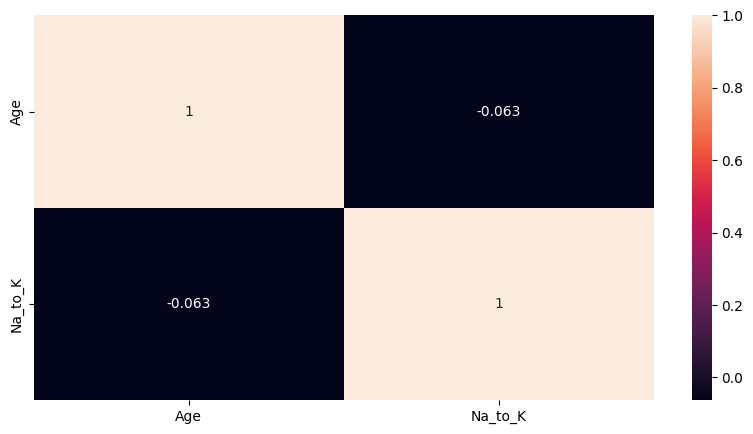

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(drug.corr(),annot=True)
plt.show()

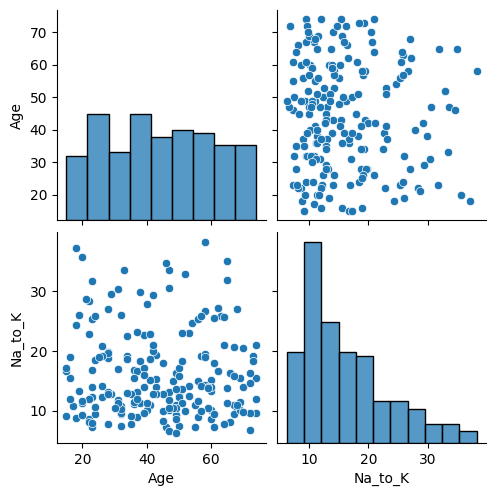

In [ ]:
sns.pairplot(drug)

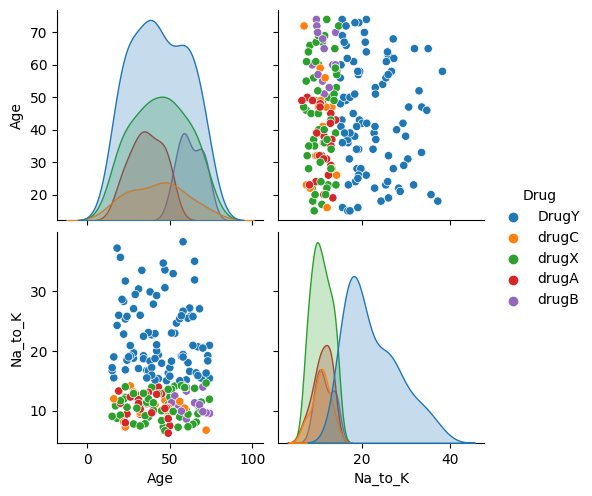

In [ ]:
sns.pairplot(drug,hue="Drug")

In [ ]:
from sklearn.preprocessing import LabelEncoder

def label_encoder(y):
    le = LabelEncoder()
    drug[y] = le.fit_transform(drug[y])

In [ ]:
label_list = ["Drug"]

for l in label_list:
    label_encoder(l)

In [ ]:
drug.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,0
1,47,M,LOW,HIGH,13.093,3
2,47,M,LOW,HIGH,10.114,3
3,28,F,NORMAL,HIGH,7.798,4
4,61,F,LOW,HIGH,18.043,0


In [ ]:
X=drug.drop("Drug",axis=1)
Y=drug.Drug

In [ ]:
from sklearn. preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
dt=['Sex','BP','Cholesterol','Age']
drug["Age"].value_counts()

47    8
23    7
28    7
49    7
39    6
32    6
50    5
37    5
58    5
60    5
22    5
34    4
72    4
51    4
42    4
26    4
24    4
74    4
67    4
68    4
61    4
56    4
20    4
36    4
45    4
41    4
31    4
43    4
65    4
57    4
53    3
40    3
70    3
59    3
16    3
38    3
15    3
69    3
35    3
18    3
64    3
52    2
55    2
62    2
19    2
29    2
66    2
73    2
46    2
48    2
54    1
17    1
33    1
63    1
30    1
21    1
25    1
Name: Age, dtype: int64

In [ ]:
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,dt)],remainder="passthrough")
transformed_x=transformer.fit_transform(X)
transformed_x

<200x65 sparse matrix of type '<class 'numpy.float64'>'
	with 1000 stored elements in Compressed Sparse Row format>

In [ ]:
pd.DataFrame(transformed_x)

,0
0,"(0, 0)\t1.0\n (0, 2)\t1.0\n (0, 5)\t1.0\n ..."
1,"(0, 1)\t1.0\n (0, 3)\t1.0\n (0, 5)\t1.0\n ..."
2,"(0, 1)\t1.0\n (0, 3)\t1.0\n (0, 5)\t1.0\n ..."
3,"(0, 0)\t1.0\n (0, 4)\t1.0\n (0, 5)\t1.0\n ..."
4,"(0, 0)\t1.0\n (0, 3)\t1.0\n (0, 5)\t1.0\n ..."
...,...
195,"(0, 0)\t1.0\n (0, 3)\t1.0\n (0, 5)\t1.0\n ..."
196,"(0, 1)\t1.0\n (0, 3)\t1.0\n (0, 5)\t1.0\n ..."
197,"(0, 1)\t1.0\n (0, 4)\t1.0\n (0, 5)\t1.0\n ..."
198,"(0, 1)\t1.0\n (0, 4)\t1.0\n (0, 6)\t1.0\n ..."


In [ ]:
dumies=pd.get_dummies(drug[["Sex","BP","Cholesterol","Age"]])

In [ ]:
dumies

,Age,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,23,1,0,1,0,0,1,0
1,47,0,1,0,1,0,1,0
2,47,0,1,0,1,0,1,0
3,28,1,0,0,0,1,1,0
4,61,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...
195,56,1,0,0,1,0,1,0
196,16,0,1,0,1,0,1,0
197,52,0,1,0,0,1,1,0
198,23,0,1,0,0,1,0,1


<ipython-input-19-3476a608e7d2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(drug.corr(),annot=True)


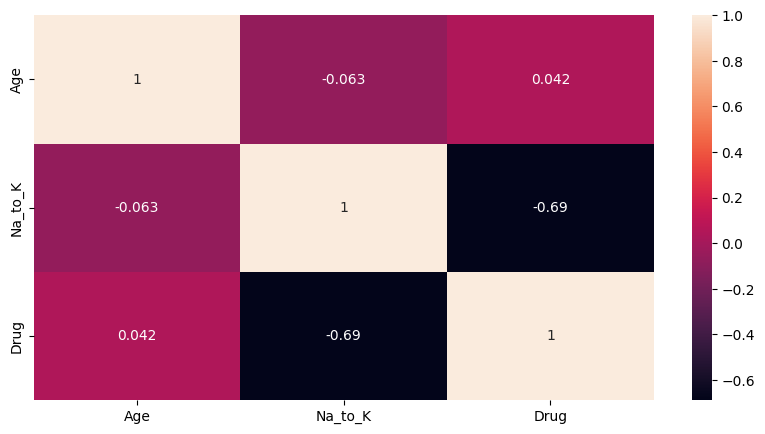

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(drug.corr(),annot=True)
#sns.heatmap(drug.corr())
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(transformed_x,Y,test_size=0.2)


In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(xtest, ytest)

LinearRegression()

In [ ]:
y_pred = regressor.predict(xtest)

In [ ]:
regressor.score(xtest,ytest)

0.9183404625069177

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
mse = mean_squared_error(ytest, y_pred)

# Calculate R-squared (R2) score
r2 = r2_score(ytest, y_pred)

# Print the metrics
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 0.22859566776969736
R-squared (R2) Score: 0.9183404625069177


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
classifier = RandomForestClassifier(random_state=42)
classifier.fit(xtrain, ytrain)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = classifier.predict(xtest)

In [ ]:
classifier.score(xtest,ytest)

0.925

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
# Create a confusion matrix
confusion = confusion_matrix(ytest, y_pred)

In [ ]:
print("Confusion Matrix:")
print(confusion)


Confusion Matrix:
[[18  0  0  0  0]
 [ 0  5  1  0  0]
 [ 0  2  1  0  0]
 [ 0  0  0  3  0]
 [ 0  0  0  0 10]]


In [ ]:
print("\nClassification Report:")
print(classification_report(ytest, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.71      0.83      0.77         6
           2       0.50      0.33      0.40         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00        10

    accuracy                           0.93        40
   macro avg       0.84      0.83      0.83        40
weighted avg       0.92      0.93      0.92        40



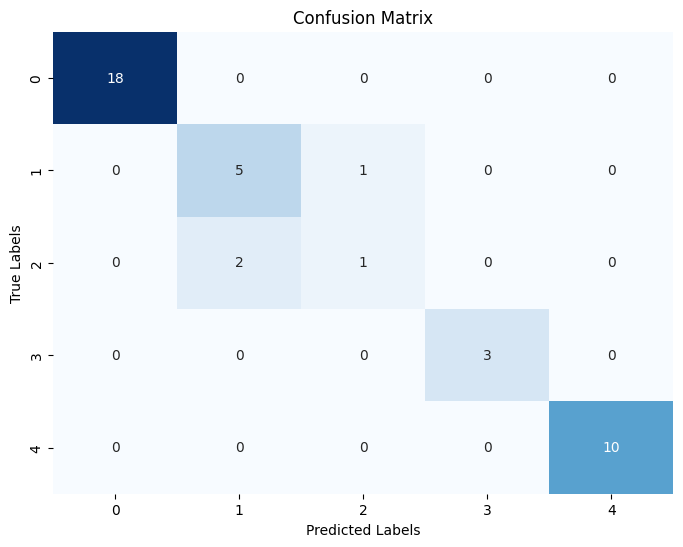

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming you have already trained a classification model and made predictions
# Replace 'classifier' with your trained model
# Replace 'X_test' and 'y_test' with your test data

# Make predictions on the test data
y_pred = classifier.predict(xtest)

# Create a confusion matrix
confusion = confusion_matrix(ytest, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
